# Motivational Example (From Foundational NN)


reference: [chollet](https://github.com/fchollet/deep-learning-with-python-notebooks)

## Download Data

In [1]:
import numpy as np

In [2]:
import keras
keras.__version__

2024-05-17 08:51:58.461661: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.15.0'

In [3]:
from keras.datasets import mnist

In [4]:
mnist.load_data?

Signature: mnist.load_data(path='mnist.npz')
Docstring:
Loads the MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
along with a test set of 10,000 images.
More info can be found at the
[MNIST homepage](http://yann.lecun.com/exdb/mnist/).

Args:
  path: path where to cache the dataset locally
    (relative to `~/.keras/datasets`).

Returns:
  Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**x_train**: uint8 NumPy array of grayscale image data with shapes
  `(60000, 28, 28)`, containing the training data. Pixel values range
  from 0 to 255.

**y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(60000,)` for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes
  (10000, 28, 28), containing the test data. Pixel values range
  from 0 to 255.

**y_test**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(10000,)` for the test data.

Example:

```python


https://keras.io/datasets/

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Explore Data

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
type(x_train)

numpy.ndarray

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
y_train.shape

(60000,)

In [10]:
y_train[2]

4

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
import matplotlib.pyplot as plt

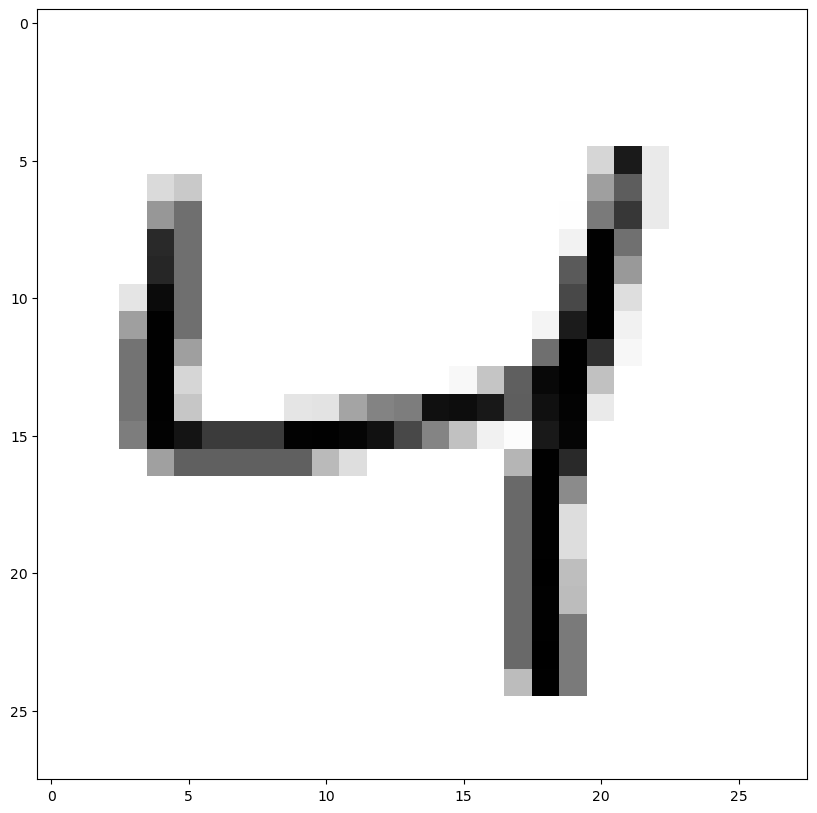

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[2], cmap='Greys');

In [15]:
x_test.shape

(10000, 28, 28)

In [16]:
y_test.shape

(10000,)

In [17]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [18]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## NN Architecture

In [19]:
from keras import models
from keras import layers

https://keras.io/getting-started/sequential-model-guide/

In [20]:
model = models.Sequential()

In [21]:
layers.Dense?

Init signature:
layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`). These are all attributes of
`Dense`.

Note: If the input to the layer has a rank greater than 2, then `Dense`
computes the dot product between the `inputs` and the `kernel` along the
last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
For example, if input has dimensions `(batch_s

In [22]:
model.add(layers.Dense(units=512,
                       activation='relu',
                       input_shape=(28 * 28,)))

In [23]:
model.add(layers.Dense(units=10,
                       activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
x_train_input = x_train.reshape((60000, 28 * 28))

In [26]:
x_train_input.dtype

dtype('uint8')

In [27]:
x_train_input.min()

0

In [28]:
x_train_input.max()

255

In [29]:
x_train_input = x_train_input.astype('float32') / 255

In [30]:
x_test_input = x_test.reshape((10000, 28 * 28))

In [31]:
x_test_input = x_test_input.astype('float32') / 255

compile model

In [32]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

one hot encode the target variable 

In [33]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model fitting

In [34]:
model.fit(x_train_input, y_train,
          epochs=10,
          batch_size=256)

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.3227 - accuracy: 0.9094
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1394 - accuracy: 0.9592
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0933 - accuracy: 0.9728
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0690 - accuracy: 0.9796
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0542 - accuracy: 0.9844
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0426 - accuracy: 0.9877
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0339 - accuracy: 0.9904
Epoch 8/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0269 - accuracy: 0.9929
Epoch 9/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0220 - accuracy: 0.9941
Epoch 10/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0173 - accuracy: 

test the model on test set or predict

In [35]:
eval_loss, eval_acc = model.evaluate(x_test_input, 
                                     y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0631 - accuracy: 0.9815


In [36]:
print('Test accuracy: {}'.format(eval_acc))

Test accuracy: 0.9815000295639038
